<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:50%;color:blue;text-align:center">    <FONT COLOR="blue">  
            Conceptos Machine Learning </p>
            Clasificación  </p> Algunos Modelos  </FONT>         </h1>
        </td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Machine Learning </p></tp>
            <tp><p style="font-size:115%;text-align:center">CoSIAM</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

# <FONT SIZE=4 COLOR="blue"> 1. Objetivos de la sesión: </FONT>

✔  En esta sesión revisaremos algunos conceptos fundamentales de Machine Learning como por ejemplo, conjunto de entrenamiento, conjunto de prueba, métrica de evaluación, validación cruzada (cross-validation),  hiperparámetros, entre otros.

✔ Por otro lado, estudiaremos en qué consisten los problemas de clasificación y estudiaremos el primer modelo clásico de este tipo: los *k-vecinos más cercanos*. Además, estudiaremos la matriz de confusión y las diferentes métricas como el *recall* , *accuracy*, *precision*, etc.


# <FONT SIZE=4 COLOR="blue"> 2. Conceptos básicos de Machine Learning 1 </FONT>

En está sección revisaremos algunos conceptos básicos de machine learning en los cuales se profundizará en lo que sigue el script.

<FONT SIZE=3 COLOR="green"> a. Algoritmos de clasificación: </FONT> son conjuntos de técnicas de aprendizaje supervisado, en el cual el resultado que queremos predecir, es decir, las "etiquetas" (variable $\mathbf{y}$), es discreto.

<br>

<FONT SIZE=3 COLOR="green"> b. Variable Objetivo: </FONT> también denominada **variable de respuesta**. En un algoritmo de aprendizaje de máquina supervisado, es la variable que queremos predecir (por lo general, denotada como $\mathbf{y}$). Esta puede ser discreta o continua. En el primer caso, da lugar a algoritmos de ***clasificación*** y en el segundo caso a algoritmos de ***regresión***.

<br>

<FONT SIZE=3 COLOR="green"> c. Variable Predictora: </FONT> también denominada **features**, son las variables que se usarán para predecir la variable objetivo. Estas se denotan como

$$\mathbf{X}=\{X_1,X_2, \dots, X_n \}$$

<br>

<FONT SIZE=3 COLOR="green"> d. Conjunto de Entrenamiento: </FONT> es el subconjunto de registros que se selecciona para entrenar el modelo. Este conjunto consta de dos partes:

- $X_{train}$ : conjunto de entrenamiento de los predictores o *features*.

- $y_{train}$: conjunto de entrenamiento de la variable objetivo asociada al conjunto $X_{train}$.

El conjunto de entrenamiento se selecciona de manera aleatoria y por lo general se toma el $70\%$ , $75\%$ y $80 \%$.

<br>

<FONT SIZE=3 COLOR="green"> e. Conjunto de Prueba o Validación: </FONT>: Es el subconjunto de registros que se selecciona para validar el modelo. Consta de dos partes:

- $X_{test}$ : conjunto de validación de los predictores o *features*.

- $y_{test}$: conjunto de validación de la variable objetivo asociada al conjunto $X_{test}$.

El tamaño de este conjunto es el complemento de los conjuntos de entrenamiento.

<br>

<FONT SIZE=3 COLOR="green"> f. Matriz de Confusión:</FONT> Herramienta usada para evaluar el rendimiento del modelo. (se ampliará más adelante las métricas y conceptos).

<br>

<FONT SIZE=3 COLOR="green"> g. Hiperparámetro: </FONT> son variables de configuración externa al modelo original (general) que se pueden ajustar para entrenar el modelo. (revisaremos este concepto en cada modelo que se aborde en el curso)


<center><FONT SIZE=4 COLOR="BLUE"> ESQUEMA GENERAL DE CLASIFICACIÓN EN MACHINE LEARNING </FONT></center>
<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/ESQUEMA%20DE%20CLASIFICACI%C3%93N.png?raw=true" alt="centered image" width="600" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>


Para el trabajo de esta sesión y las próximas usaremos

***Python:***

- Lenguaje de programación de alto nivel.

- Tiene una curva de aprendizaje rápida. Es ideal para las personas que se están viculando al mundo del Machine Learning.

- Es un lenguaje de propósito general y colaborativo, ya que es open source.

- Python tiene módulos para carga de datos, visualización, estadísticas, procesamiento de lenguaje natural, procesamiento de imágenes, entre muchas más herramientas.  

**[scikit-learn](https://scikit-learn.org/stable/)**

- Es un proyecto de código abierto.

- Contiene una serie de algoritmos de machine learning, así como documentación completa sobre cada algoritmo.

Vamos a revisar la versión que tenemos en colab.

In [1]:
## Version de python en Colab
!python --version

Python 3.10.12


A continuación, revisaremos en detalle uno de los primeros algoritmos de machine learning y con este ilustraremos algunos conceptos y herramientas que aplican también para otros algortimos de clasificación.

# <FONT SIZE=4 COLOR="blue"> 3. Algoritmo de clasificación KNN : K-vecinos más cercanos </FONT>

En esta sección revisaremos el algoritmo de clasificación ***KNN: k-nearest neigbors*** : K-vecinos más cercanos. A continuación, algunas observaciones del modelo.

- Es uno de los algoritmos más sencillos de Machine Learning (a veces denominado de aprendizaje flojo).

- Es un algoritmo de tipo supervisado

- Utiliza todo el conjunto de datos para entrenar "cada punto" y requiere mucha memoria y recursos de cómputo.

- Funciona bien para conjuntos de datos no tan grandes y sin tantas variables.


## <FONT SIZE=4 COLOR="blue"> 3.1 ¿En qué consiste? </FONT>

Este algoritmo consiste en consiste en clasificar los valores de una variable categórica de acuerdo con los vecinos más cercanos. A continuación explicaremos el funcionamiento

1. Supongamos que queremos clasificar el cuadrado amarillo en las dos posibles clases.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/knn1.png?raw=true?" alt="centered image" width="600" height="450"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Libro Guía  </FONT> <figcaption></center>




2. Por ejemplo, si tenemos otro valor de $k$ la clasificación puede cambiar.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/knn2.png?raw=true?" alt="centered image" width="600" height="450"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Libro Guía  </FONT> <figcaption></center>



## <FONT SIZE=4 COLOR="blue"> 3.2 Descripción del algoritmo: pseudocódigo </FONT>

- Determinar el valor de $k$.

- Calcular la distancia del punto a clasificar a todos los otros puntos.

- Ordenar de manera ascendente las distancias.

- Tomar los puntos más cercanos al punto a clasificar de acuerdo con el valor que le asignemos a $k$.

- Contar cuaántos puntos de cada clase están en la vecindad y definimos por mayoría.

- Por ejemplo: Si k es 3 y tenemos

   + Distancia 1 : 2.5 : clase a

   + Distancia 2 : 2.51 : clase b

   + Distancia 3 : 2.53 : clase a

  Conclusión: El punto se clasifica en la clase a.

En caso de que haya empate se pueden definir algunos criterios de desempate. Por ejemplo:

  - la clase que contenga al vecino más cercano.
  - la clase con la distancia media más pequeña.

## <FONT SIZE=4 COLOR="blue"> 3.3 Sobre el algoritmo </FONT>

A continuación, algunos puntos importantes que se deben tener en cuenta sobre el algoritmo *knn*

1. Observe que no se genera un modelo que sea consecuencia de un entrenamiento previo, sino que el aprendizaje se da en el mismo momento en el que se prueban los datos de validación. A este tipo de algoritmos se les denomina ***lazy learning methods***.

2. Como utiliza todo el set de entrenamiento para calcular las distancias, se tiene un costo computacional alto.

3. Es un algoritmo que da buenos resultados, pero es recomendable para conjuntos de datos no tan grandes.

4. Es muy sensible al valor de $k$ y a la distancia seleccionada.

5. Es importante escalar los datos.

## <FONT SIZE=4 COLOR="blue"> 3.4 Sobre las distancias </FONT>

El algoritmo $knn$ está fundamentado en la distancia entre dos puntos. Si bien, una de las distancias más conocida es la distancia euclideana, existen otras distancias que se pueden usar para el algoritmo.

## <FONT SIZE=3 COLOR="magenta"> Distancia Euclideana </FONT>

$$ \left (\sum \limits_{i=1}^m (x_i-y_i)^2 \right)^{1/2}$$

Esta métrica se puede usar para variables con valores discretos o continuos en general.

## <FONT SIZE=3 COLOR="magenta"> Distancia de Manhattan</FONT>

$$ \sum \limits_{i=1}^{m} |x_i-y_i|$$

Observe que es más sencilla que la euclideana (tiene menos cálculos)

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/knn3.png?raw=true?" alt="centered image" width="600" height="450"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>

La métrica euclideana y de Manhattan tienen una generalización que se denomina.

## <FONT SIZE=3 COLOR="magenta"> Distancia de Minkowski</FONT>

$$ \left (\sum \limits_{i=1}^m (x_i-y_i)^p \right)^{1/p}$$

## <FONT SIZE=3 COLOR="magenta"> Distancia de Hamming</FONT>

$$Distancia \,\, Hamming : \begin{cases} 0 & \text{si $x=y$} \\ 1 & \text{si $x \neq y$}   \end{cases}$$

Esta distancia es equivalente a la de Manhattan para variables binarias, es decir, que solo tienen ceros y unos

$$ a = \begin{pmatrix} 1 \\ 0 \\ 1 \\ 1 \end{pmatrix}  \qquad b = \begin{pmatrix} 0 \\ 1 \\ 1 \\ 1 \end{pmatrix}$$

## <FONT SIZE=3 COLOR="magenta"> Distancia Euclideana con pesos </FONT>

$$ \left (\sum \limits_{i=1}^m w_i(x_i-y_i)^2 \right)^{1/2}$$

donde los pesos resultan, por ejemplo, del escalamiento de los datos.



## <FONT SIZE=4 COLOR="blue"> 3.5 Sobre los valores de $k$ </FONT>

Un parámetro muy importante en el algoritmo de *knn* es el valor de $k$.  Inicialmente, no hay una forma general de escogerlo, sin embargo

- Si se toma un valor de $k$ muy pequeño se puede sobreajustar (overfitting).

- Si el valor de $k$ es muy grande sucede lo contrario. Será más dificil clasificar.

- Se recomienda **Tunear** (optimizar) el hiperparámetro $k$. Se dice hiperparámetro ya que es un parámetro que se utiliza para entrenar el modelo.

## <FONT SIZE=4 COLOR="blue"> 3.6 Sobre el escalamiento </FONT>

El algoritmo *knn* está fundamentado en seleccionar mínimas distancias, en ese orden de ideas, observe lo siguiente.

- Si se tiene una variable $X_1$ que varía en $[1,2]$ y otra variable $X_2$ que varía en $[1000, 2000]$. Al calcular distancias con los valores de estas variables $X_2$ dominará a $X_1$ que tiene valores más pequeños y como la algoritmo utiliza la distancia para clasificar entonces queda sesgado el resultado.

Por lo anterior, se deben escalar las variables predictoras y en general se usan las siguientes dos funciones.

## <FONT SIZE=3 COLOR="blue"> StandardScaler </FONT>

$$\dfrac{X-\mu}{\sigma}$$


## <FONT SIZE=3 COLOR="blue"> MaxminScaler </FONT>

$$\dfrac{X-X_{min}}{X_{max}-X_{min}}$$





A continuación, revisaremos un ejemplo donde ilustraremos los conceptos, el código de programación y otros elementos importantes.

# <FONT SIZE=5 COLOR="blue"> 4. Ejemplo Práctico </FONT>

- En esta sección haremos un ejemplo práctico.

- Iniciaremos indicando las librerías que debemos usar.

## <FONT SIZE=4 COLOR="blue"> 4.1 Librerías de trabajo </FONT>

In [31]:
# Manipulación de data.frames
import pandas as pd
import numpy as np

# Librerías para Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15,6)

# Librerías para datos de entrenamiento y prueba
from sklearn.model_selection    import train_test_split

# Para preprocesamiento
from sklearn.preprocessing      import StandardScaler, MinMaxScaler

# Para aplicar k-nearest neiborg
from sklearn.neighbors          import KNeighborsClassifier

# Métricas de evaluación
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score

# Optimización de hiperparámetros
from sklearn.model_selection    import GridSearchCV, RandomizedSearchCV

# Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

## <FONT SIZE=4 COLOR="blue"> 4.2 Contexto del problema </FONT>

 En este caso intentaremos predecir a qué categoría corresponde un conjunto de datos.

En términos generales, seremos mucho más precisos si tenemos que modelar el comportamiento de una categoría que de una variable continua, por lo que veremos que muchas veces, incluso los problemas de predecir variables numéricas se pueden discretizar y convertir en problemas de clasificación.

En este caso, veremos un caso típico de un problema de clasificación. Queremos predecir si una integrante de una muestra que representa a una población, en este caso de Indias Pima, tiene diabetes. Queremos hacer esto a partir de múltiples variables que tenemos de cada uno de los pacientes:

- ***Pregnancies***: Número de embarazos que ha tenido en su vida
- ***Glucose***: Nivel de concentración de glucosa en sangre
- ***BloodPressure***: Presión arterial
- ***SkinThikness***: Espesor de piel a la altura del triceps
- ***Insulin***: Respuesta a dosis de insulina en 2 horas
- ***BMI***: Índice de masa corporal
- ***DiabetesPedigreeFunction***: Presencia de diabetes en ascendencia directa
- ***Age***: Edad del paciente
- ***Outcome***: Variable que queremos predecir:
   - $1$ : Tiene diabetes
   - $0$ : No tiene diabetes



## <FONT SIZE=4 COLOR="blue"> 4.4 Importar los datos </FONT>

Vamos a traer los datos del GitHub de la siguiente manera.

Lo primero que haremos es importar los datos que están en el siguiente link o pueden ser descargados de la página de Kaggle.

In [48]:
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/diabetes.csv"

In [49]:
diabetes= pd.read_csv(url)

In [50]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## <FONT SIZE=4 COLOR="blue"> 4.5 Exploración de los datos </FONT>

Este paso fue el que hicimos en el cuaderno anterior

In [6]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Convertimos a data.frame

In [32]:
A=diabetes.Outcome.value_counts().to_frame()
A

,Outcome
0,500
1,268


Hacemos la gráfica de barras de las frecuencias

In [8]:
# gráfica con plotly express
px.bar(x = A.index ,
       y = A.Outcome)

**Cuidado 🍳**: En esta parte hay que tener especial atención,  particularmente en otros algoritmos. Cuando los datos están desbalanceados pueden afectar los resultados. Para esto usaremos en las próximas sesiones : *subsampling*, *oversampling* y *smote*. Los anteriores son técnicas de balanceo.

- Para continuar con el ejercicio, trabajaremos con las clases como están.

## <FONT SIZE=4 COLOR="blue"> 4.6 Conjunto de Entrenamiento y Prueba </FONT>

- **data training:** Datos que usamos para entrenar el modelo.

- **testing data:** Datos que reservamos para comprobar si el modelo generado a partir de los datos funciona

Normalmente, usamos $70\%-30\%$ / $80\%-20\%$

In [13]:
# Dividir en dos conjuntos
# las variables predictoras
X = diabetes.drop("Outcome", axis=1)
# la variable objetivo
y = diabetes.Outcome
X_train, X_test, y_train, y_test = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    random_state = 0,         # semilla para que al ejecutar siempre de igual
                                                    test_size = 0.2)          # tamaño del conjunto de prueba

Veamos los tamaños de estos conjuntos

In [37]:
print("El tamaño de X_train es {}".format(X_train.shape))
print("El tamaño de y_train es: {}".format(y_train.shape))
print("El tamaño de X_test es {}".format(X_test.shape))
print("El tamaño de y_test es: {}".format(y_test.shape))

El tamaño de X_train es (614, 8)
El tamaño de y_train es: (614,)
El tamaño de X_test es (154, 8)
El tamaño de y_test es: (154,)


Exploremos alguno de ellos.

## <FONT SIZE=4 COLOR="blue"> 4.7 Escalar las variables predictoras </FONT>

- En los algoritmos donde se vea involucrada una distancia es importante hacer el escalamiento.

- Una recomendación es hacer el escalamiento después de dividir en entrenamiento y prueba. Ya que la idea es que no se sobreentrene el modelo.


In [39]:
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

**Observación importante de lo anterior**.

a. Para $X_{train}$ usamos ***fit.transform*** esto significa que los datos se este conjunto se escalarán con base a su $\mu$ media y $\sigma$ desviación estándard. (que no son lo mismo que calcularla sobre todo el conjunto)

b. Para $X_{test}$ usamos ***.transform*** esto significa que para escalar los datos del conjunto de prueba se usan los parámetros $\mu$ y $\sigma$ obtenidos en la parte a. con el conjunto de entrenamiento $X_{train.}$

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/knn4.png?raw=true?" alt="centered image" width="600" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>



## <FONT SIZE=4 COLOR="blue"> 4.8 Selección de $k$  </FONT>

- Inicialmente seleccionamos un valor un $k$, ejecutamos el modelo y luego revisamos otros valores de $k$ para ver si tenemos mejores resultados.

## <FONT SIZE=4 COLOR="blue"> 4.9 Generar el Modelo  </FONT>

En esta parte usaremos la librería *sciki-learn* y la función *KNeighborsClassifier*

In [41]:
KNN = KNeighborsClassifier(n_neighbors = 15,              # número de vecinos k=10
                           metric = 'euclidean')          # métrica euclideana
KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

## <FONT SIZE=4 COLOR="blue"> 4.10 Evaluar en el conjunto de Prueba  </FONT>

Luego de tener el modelo entrenado con **X_{train}** y **y_{train}** pasamos a calcularlo en el conjunto **X_{test}**, con lo cual obtendremos valores de predicción del modelo.

In [42]:
y_pred = KNN.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

La pregunta que nos hacemos ahora es:

***¿Qué tanta coincidencia hay en el modelo con los datos de prueba?***

La respuesta a esta pregunta la tendremos justamente comparando **$y_{pred}$** con **$y_{test}$**. Esto lo haremos con una herramienta muy importante en Machine Learning y modelos de clasificación denominada ***matriz de confusión***.

# <FONT SIZE=5 COLOR="blue"> 5. Matriz de Confusión </FONT>

En el campo del Machine Lerning la **matriz de confusión** es una herramienta que permite visualizar el desempeño de un algoritmo  de aprendizaje supervisado.

- Las columnas de la matriz representa el número de predicciones de cada clase.

- Las filas representan las instancias en la clase real.

Esta matriz permite ver qué tipos de aciertos y errores está teniendo nuestro modelo a la hora de pasar por el proceso de aprendizaje con los datos.

En el siguiente gráfico se muestra lo anterior

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Imagen/metricas.png?raw=true" alt="centered image" width="500" height="400"></center>
<br>

Para entender la matriz de confusión debemos definir dos conceptos:

**Exactitud:** Mide cuánto se aproximan los resultados al valor verdadero

**Precisión:** Mide cuánto se aproximan los datos entre sí.

Veamos algunas definiciones

**Verdadero positivo:** El valor real es positivo y la prueba predice tambien que es positivo.

- La persona estaba enferma y el modelo predice bien que estaba enferma. *Prediccón correcta*

**Verdadero negativo:** El valor real es negativo y la prueba predice tambien que el resultado es negativo.

- La persona no está enferma y el modelo predice que no está enferma. *Predicción correcta*

**Falso negativo:** El valor real es positivo, y la prueba predice que el resultado es negativo.

- La persona esta enferma y el modelo predice que no lo está. *predicción incorrecta* : error tipo II

**Falso positivo:** El valor real es negativo, y la prueba predice que el resultado es positivo.

- La persona no está enferma y el modelo predice que lo está. *predicción incorrecta* : error tipo I

Veamos las métricas que se utilizan para evaluar el modelo.

**Accuracy** : Exactitud

- La Exactitud (en inglés, “Accuracy”) se refiere a lo cerca que está el resultado de una medición del valor verdadero.

- Es el porcentaje de predicciones correctas de todo el modelo.

- En términos estadísticos, la exactitud está relacionada con el sesgo de una estimación.

- Es la proporción de resultados verdaderos (tanto verdaderos positivos (VP) como verdaderos negativos (VN)) dividido entre el número total de casos examinados (verdaderos positivos, falsos positivos, verdaderos negativos, falsos negativos)

$$Accurary = \dfrac{VP+VN}{VP+FN+VN+FP}$$

**Precision** : Precisión

- La Precisión (en inglés “Precision”)  se refiere a la dispersión del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud.

- A mayor precisión menos es la dispersión.

- Es la proporción de verdaderos positivos dividido entre los resultados etiquetados como positivos.

- Es el porcentaje de casos reales positivos dentro de los casos positivos detectados.

$$Precision = \dfrac{VP}{VP+FP}$$

**Recall**: sensibilidad

- Es la proporción de casos positivos que fueron correctamente identificadas por el algoritmo.

$$recall = \dfrac{VP}{VP+FN}$$

*En el área de la salud se dice que la sensibilidad o recall es la capacidad de de poder detectar correctamente la enfermedad entre los enfermos*

**Especifity**

- Es la proporción de casos negativos que fueron correctamente identificadas por el algoritmo.

$$Especifity = \dfrac{VN}{VN+FP}$$

*En el area de la salud se dice que la especificidad es la capacidad de poder identificar los casos de pacientes sanos entre todos los sanos*

**F1 Score:**

- Esta una métrica muy empleada porque nos resume la precisión y sensibilidad en una sola métrica. Por ello es de gran utilidad cuando la distribución de las clases es desigual, por ejemplo cuando el número de pacientes con una condición es del 15% y el otro es 85%.

$$F1 = \dfrac{2*precision*recall}{precision+recall} $$

$$ F1= \dfrac{2}{ \dfrac{1}{precision}+\dfrac{1}{recall}} $$

Resumen:

**Alta precisión y alto recall**: el modelo de Machine Learning escogido maneja perfectamente esa clase.

**Alta precisión y bajo recall**: el modelo de Machine Learning escogido no detecta la clase muy bien, pero cuando lo hace es altamente confiable.

**Baja precisión y alto recall**: El modelo de Machine Learning escogido detecta bien la clase,  pero también incluye muestras de la otra clase.

**Baja precisión y bajo recall**: El modelo de Machine Learning escogido no logra clasificar la clase correctamente.

***Observación importante***

- Cuando se tiene un conjunto de datos con clases **desbalanceadas**, suele ocurrir que obtenemos un alto valor de precisión en la clase mayoritaria y un bajo recall en la clase Minoritaria.  En el campo de la salud ésta circunstancia es particularmente frecuente y se debe recurrir al balanceo de clases.

Consejos generales sobre La matriz de confusión y sus métricas:

1,) La precisión es un gran estadístico, pero es útil únicamente cuando se tienen conjuntos de datos simétricos (la cantidad de casos de la clase 1 y de las clase 2 tienen magnitudes similares)

2.) El indicador F1 de la matriz de confusión es útil si se tiene una distribución de clases desigual.

3.) Elija mayor precisión para conocer qué tan seguro está de los verdaderos positivos, Mientras que la sensibilidad o “Recall” le servirá para saber si no está perdiendo positivos.

4.) Las Falsas Alarmas:  Por ejemplo,  si cree que es mejor en su caso tener falsos positivos que falsos negativos, utilice una sensibilidad alta  (Recall) , cuando la aparición de falsos negativos le resulta inaceptable pero no le importa tener falsos positivos adicionales (falsas alarmas).

Un ejemplo de esto es:  Prefieres que algunas personas sanas sean etiquetadas como diabéticas en lugar de dejar a una persona diabética etiquetada como sana.

5.)  Elija precisión (precision en inglés)  si quiere estar más seguro de sus verdaderos positivos. por ejemplo, correos electrónicos no deseados.  En este caso se prefiere tener algunos correos electrónicos “no deseados” en su bandeja de entrada en lugar de tener correos electrónicos “reales” en su bandeja de SPAM.

6.) Elija alta Especificidad:  si desea identificar los verdaderos negativos, o lo que es igual cuando no desea falsos positivos. Por ejemplo conductores  y las pruebas de alcoholemia

Referencia : https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/




Con base a lo anterior vamos a construir la matriz de confusión

In [45]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[95, 12],
       [18, 29]])

Una versión más elaborada de la matriz de confusión.

Text(0.5, 36.72222222222221, 'Predicciones')

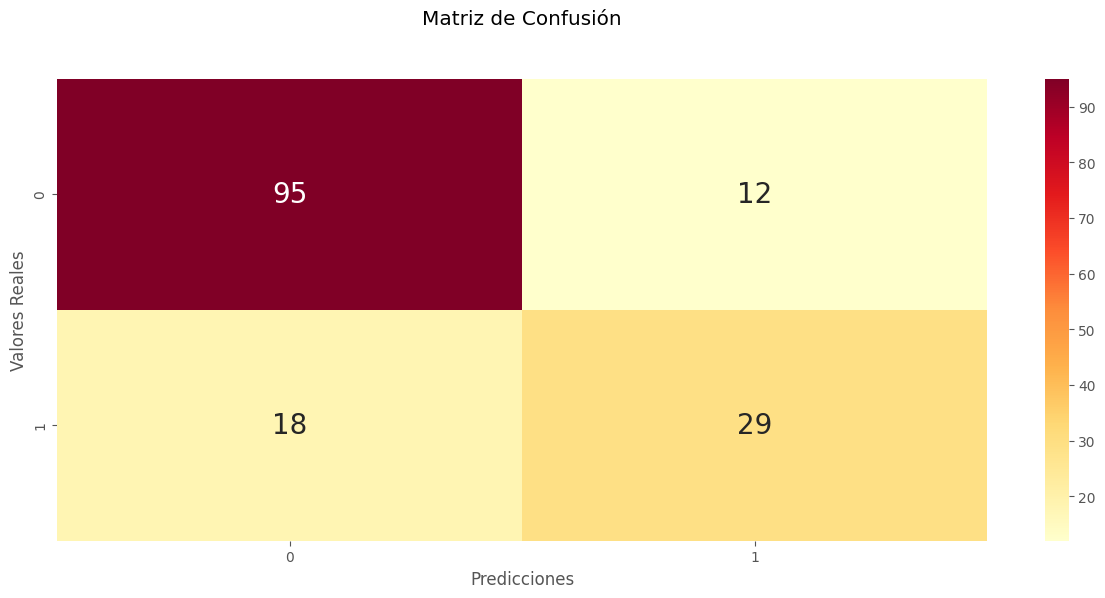

In [44]:
from sklearn import metrics
MC= metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

Vamos a calcular la precisión del modelo

In [46]:
#accuracy score
print(accuracy_score(y_test,y_pred))

0.8051948051948052


Revisaremos las otras métricas

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.71      0.62      0.66        47

    accuracy                           0.81       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



**Conclusiones**:

- El modelo está clasificando bien al $81%$ de los registros.

- El *recall* es $62\%$, es decir, de las personas que tienen diabetes, el algoritmo detecta el $62\%$.

# <FONT SIZE=5 COLOR="blue"> 5. Predicción en KNN </FONT>



Particularmente, en estos algoritmos en los que se debe escalar, es importante escalar los valores a predecir. Este escalamiento se hace con base a $X_{train}$

In [ ]:
[6,	148,	72,	35,	0,	33.6,	0.627,	50]

In [51]:
X_new = np.array([[5,	150,	70,	33,	0,	31.7,	0.618,	48]])
X_news = (X_new-X_train.mean())/(X_train.std())
X_news
# escalar.transform(X_new)

array([[ 5.00000000e+00,  1.50000000e+02,  7.00000000e+01,
         3.30000000e+01, -7.05190521e-18,  3.17000000e+01,
         6.18000000e-01,  4.80000000e+01]])

In [52]:
KNN.predict(X_news)

array([1])

También se puede hacer así:

In [53]:
escalar = StandardScaler()
X_train1 = escalar.fit_transform(X_train)
X_test1 = escalar.transform(X_new)

# <FONT SIZE=5 COLOR="blue"> 6. Optimicemos el valor de k </FONT>

Para esto podemos programar una función que itere sobre $k$ de la siguiente manera.

In [ ]:
k_range = range(1, 20) # rango de k. k desde 1 a 20.
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel("# de vecinos k")
plt.ylabel("accuracy")
plt.scatter(k_range, scores)
plt.xticks(range(1,20))

Podemos volver a ejecutar el modelo con $k=16$

# <FONT SIZE=5 COLOR="bronw"> Validación Cruzada </FONT>

La **validación cruzada**, o *cross validation*, es una técnica utilizada para evaluar los resultados obtenidos de un modelo de *machine learning* y garantizar que son independientes de los conjuntos de entrenamiento ($X_{train}$) y prueba ($X_{test}$).

- Cuando usamos la función de *sklearn*:

$$train\_test\_split(X, y, random\_state = 123 )$$

se extraen dos muestras aleatorias como conjuntos de entrenamiento y prueba y luego se hace el proceso de entrenamiento y validación del modelo, teniendo como referencias las muestras seleccionados. Sin emabrgo, una pregunta natural es:

**¿Qué sucede si tomo otras muestras como conjunto de entrenamiento y de prueba, obtendré los mismos resultados?**

Para responder lo anterior, debemos seleccionar varias muestras que correspondan a conjunto de entrenamiento y prueba diferentes y hacer el análisis del modelo. Precisamente, esto es lo que hace el proceso de validación cruzada.

Se divide el conjunto de datos en $n$ partes, de las cuales se toma una como conjunto de *prueba* y las otras $n-1$ como conjunto de entrenamiento. Y vamos rotando el conjunto de prueba, tal y como se muestra en la siguiente figura.

<br>

<center><img src="https://github.com/Fabian830348/cursos/blob/master/val_cruzada/validation1.png?raw=true?" alt="centered image" width="600" height="350"></center>

<br>

In [64]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold_validacion = KFold(10)                               # divide los datos en 10 pliegues.
resultados = cross_val_score(KNN,                          # modelo aplicado
                             X,                            # conjunto de predictores
                             y,                            # variable de respuesta
                             cv = kfold_validacion,        # número de divisiones en cross-validation.
                             scoring = "accuracy")         # se puede escoger la métrica.
print(resultados)                                          # para ver la variable resultados.
resultados.mean()

[0.72727273 0.80519481 0.68831169 0.5974026  0.76623377 0.79220779
 0.77922078 0.84415584 0.73684211 0.73684211]


0.7473684210526315

# <FONT SIZE=5 COLOR="bronw"> Búsqueda en Grilla </FONT>

- La ***búsqueda en grilla*** (grid search) es una método que buscar las mejores combinaciones de parámetros que hacen que un modelo tenga el error más bajo, es decir, estimaciones más precisas.

- En cada combinación de parámetros, la búsqueda en grilla aplica el proceso de *cross-validation* con el fin de dar una mejor evaluación del modelo en cada punto.

- Cuando hablamos de búsqueda en grilla tenemos algunas alternativas. La primera se denomina propiamente *Grid Search* y en este método, se toman todas las combinaciones posibles de los hiperparámetros que se van a revisar. Como se ilustra en la siguiente gráfica

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/val_cruzada/grid1.png?raw=true?" alt="centered image" width="600" height="350"></center>
<br>

In [ ]:
from sklearn.model_selection import GridSearchCV

# definimos los parámetros que vamos a combinar. Diccionario
grid_params = {"n_neighbors" : list(range(1, 20)),         # se recorre la lista en k
               "weights" : ["uniform","distance"],         # se establecen los pesos
               "metric" : ["euclidean","manhattan"]}       # se establecen las métricas

# hacemos la búsqueda en grilla con 5-folds
Grid_Search = GridSearchCV(KNN,                            # el modelo aplicado
                  grid_params,                             # los parámetros que van a variar
                  cv = 10,                                 # el número de folds
                  verbose = 3)                             # para que imprima resultados. Posibilidades: 1,2 o 3
# Entrenar el modelo obtenido arriba
g_res = Grid_Search.fit(X_train,y_train)

Ahora, buscamos el mejor *score*

In [62]:
print("Mejor score: ",g_res.best_score_)

Mejor score:  0.757377049180328


Finalmente, los hiperparámetros que lograron ese *score*

In [63]:
print("Mejores hiperparámetros", g_res.best_params_)

Mejores hiperparámetros {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


# <FONT SIZE=5 COLOR="bronw"> Regresión Logística </FONT>

In [66]:
# librería
from sklearn.linear_model import LogisticRegression

In [67]:
# generar y entrenar el modelo
from sklearn.linear_model import LogisticRegression as LR
clasificador = LR(random_state=0)
clasificador.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [74]:
# calculamos las predicciones
y_pred = clasificador.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [70]:
# matriz de confusión
from sklearn.metrics import confusion_matrix as CM
cm = CM(y_test, y_pred)
cm

array([[98,  9],
       [18, 29]])

Text(0.5, 36.72222222222221, 'Predicciones')

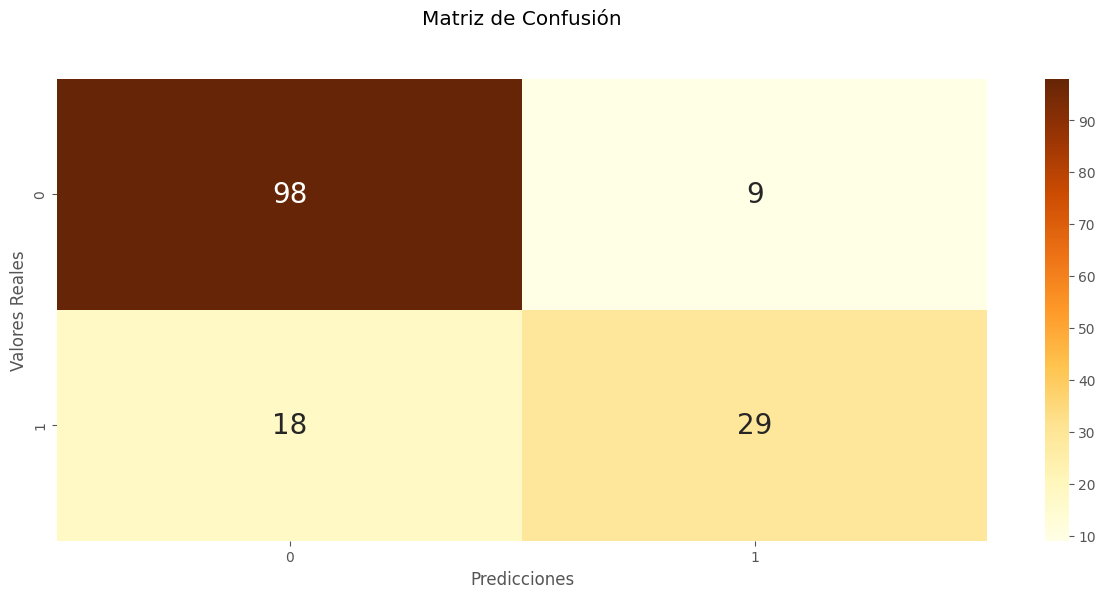

In [71]:
from sklearn import metrics
cm = CM(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm),                   # data.frame
                annot=True,                         # colocar números de las cajitas
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlOrBr",                      # color de la letra
                fmt='g')                            # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



# <FONT SIZE=5 COLOR="bronw"> Árboles de Decisión </FONT>

In [86]:
from sklearn.tree             import DecisionTreeClassifier
from sklearn.tree             import export_graphviz
from graphviz                 import Source

In [78]:
# Generamos el modelo
model_Tree = DecisionTreeClassifier(max_depth = 6,           # Profundidad del árbol
                                     criterion = "gini",      # Función de costo.
                                     random_state = 123)      # Semilla

In [79]:
# Entrenamos el modelo
model_Tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=123)

In [ ]:
# Revisamos la profundidad y el número de nodos terminales
print(f"Profundidad del árbol: {model_Tree.get_depth()}")
print(f"Número de nodos terminales: {model_Tree.get_n_leaves()}")
# Generamos el árbol
dot_data = export_graphviz(model_Tree,                                 # modelo
                           feature_names = X.columns,            # columnas de entrenamiento
                           filled=True,)                               # colores del árbol (relleno)
Source(dot_data, format="png")

In [88]:
# Prediccion de las clases vía el modelo DecisionTree.
y_predict = model_Tree.predict(X_test)

Text(0.5, 36.72222222222221, 'Predicciones')

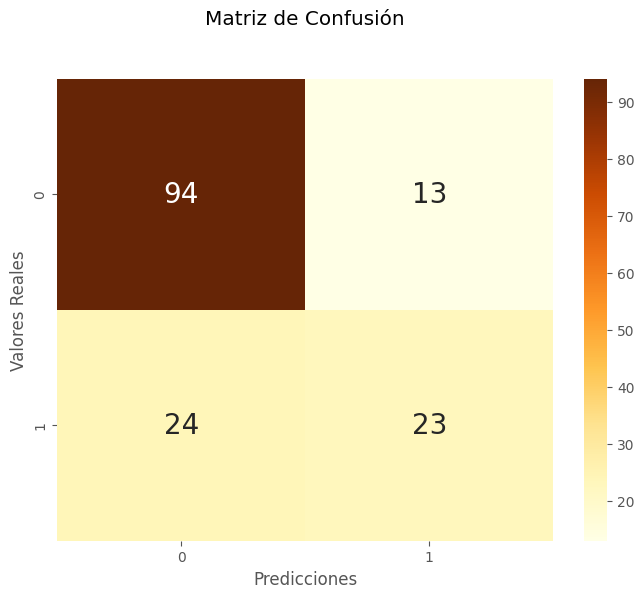

In [89]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix as CM
plt.rcParams["figure.figsize"] = (8, 6)
# Matriz de Confusión
cm = CM(y_test, y_predict)
p = sns.heatmap(pd.DataFrame(cm),                   # data.frame
                annot=True,                         # colocar números de las cajitas
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlOrBr",                       # color de la letra
                fmt='g')                            # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

In [91]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       107
           1       0.64      0.49      0.55        47

    accuracy                           0.76       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.75      0.76      0.75       154

